# Analisis de datos covid-19 en China

Para este ejercicio se hara un modelo de regresión que pueda predecir el número de mujeres infectadas con base en la edad

Alvarez Loran Juan Pablo
Lagunas Parra Ana Paola

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


datos_covid=pd.read_csv("https://raw.githubusercontent.com/adrishg/PythonML-PrebecariosProteco/master/DataSets/COVID19_open_line_list.csv?fbclid=IwAR2e-VdsdmyWbo6DOS_Pe3Fh2czQ3AYpDN6qtxXhZD4HvwZVaSMp-biutpA")
datos_covid.info
datos_covid.head()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Como se puede ver en la tabla, hay gran cantidad de filas y columnas vacías o con datos que no se utilizarán por lo que el primer paso es filtrar los datos en los que estamos interesados.

In [2]:
#Utilizaremos expresiones regulares para el filtrado de algunos datos 
import re

#En un diccionario guardamos las columnas de interés y las pasamos a un dataframe 
datos_covid_female=datos_covid[datos_covid.sex=="female"]
d={'Edad':datos_covid_female["age"], 'Sexo': datos_covid_female["sex"]}
datos_covid_female_filtrados= pd.DataFrame(data=d)

#Dentro del dataframe eliminamos los valores Nan
datos_covid_female_filtrados=datos_covid_female_filtrados.dropna()

lista_datos=list(datos_covid_female_filtrados["Edad"])

 #Debido a que algunas edades estan dadas en rangos (por ejemplo, 60-65 años) por medio de regex 
 #vamos a filtrar esos rangos y se ocupará la media de ese rango como la edad 
for i in lista_datos:
    x=re.match(r"(\d*)-(\d*)",i)
    if x:
        prom=(int(x.group(1))+int(x.group(2)))/2
        prom=int(prom)
        index=lista_datos.index(i)
        lista_datos[index]=str(prom)

datos_covid_female_filtrados["Edad"]=lista_datos

datos_covid_female_filtrados["Edad"]= pd.to_numeric(datos_covid_female_filtrados["Edad"])

#La lista filtrada con los valores acondicionados para su uso 
datos_covid_female_filtrados.head()



,Edad,Sexo
3,47.0,female
4,50.0,female
6,42.0,female
8,59.0,female
13,38.0,female


In [3]:
#Contamos la incidencia de casos por edad 
conteo_edades=datos_covid_female_filtrados["Edad"].value_counts()


En la siguiente gráfica podemos ver los casos de infección por edad en China

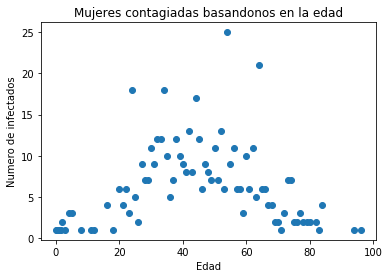

In [4]:
#Graficamos los datos obtenidos en una grafica de dispersión
X= list(conteo_edades.keys())
Y= list(conteo_edades.values)
plt.scatter(X,Y)
plt.xlabel('Edad')
plt.ylabel('Numero de infectados')
plt.title('Mujeres contagiadas basandonos en la edad')
plt.show()

# Modelo desde Scratch

Este modelo se construye desde cero, sin le uso de bibliotecas como lo es scikit-learn

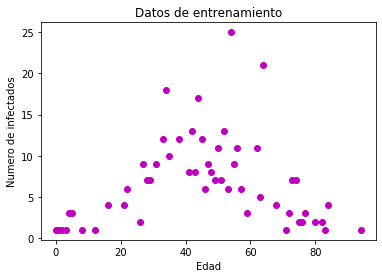

In [5]:
# Pasamos a un dataframe los datos de edad y conteo de infectados
d={'Edad':conteo_edades.keys(), 'Conteo': conteo_edades.values}
datos_scratch=pd.DataFrame(d)

# Dividimos los datos en train y test
datos_scratch_shuffle= datos_scratch.sample(frac=1)

# El tamaño del train set será el 70% de los datos
train_size=int(0.7*len(datos_scratch))

train_set=datos_scratch_shuffle[:train_size]
# El otro 30% serán datos de entrenamiento
test_set=datos_scratch_shuffle[train_size:]

#Convertimos los valores a listas para un manejo estandarizado

train_set_ejex=train_set["Edad"]
train_set_ejex=train_set_ejex.values
train_set_ejey=train_set["Conteo"]
train_set_ejey=train_set_ejey.values

test_set_ejex=test_set["Edad"]
test_set_ejex=test_set_ejex.values
test_set_ejey=test_set["Conteo"]
test_set_ejey=test_set_ejey.values

#Graficamos datos de entrenamiento
plt.scatter(train_set["Edad"],train_set['Conteo'], color='m')
plt.title('Datos de entrenamiento')
plt.xlabel('Edad')
plt.ylabel('Numero de infectados')
plt.show()

## Regresión lineal
Se probará el ajuste de la curva con una regresión lineal simple.
\begin{equation}
y_{i}= \beta_{0} + \beta_{1}x
\end{equation}
Evidentemente este método no satisface la forma en que los datos se dispersan

El modelo de entrenamiento utilizado es el siguiente 

\begin{equation}
w=(X^{T}X)^{-1}X^{T}y
\end{equation}

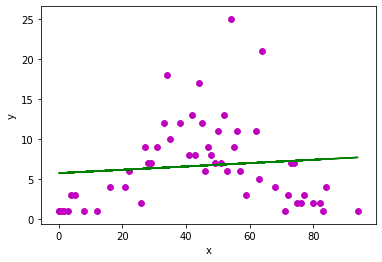

In [6]:
#iniciamos con un modelo de regresion lineal
N= len(train_set)
X=np.c_[np.ones(N), train_set_ejex]
A=np.linalg.inv(X.T@X)
D=A@X.T

resultado=D@train_set_ejey

y_pred=[]

def regresion_lineal(x,y,b):
  plt.scatter(x,y, color="m", marker="o",s=30)

  global y_pred
  y_pred=b[0]+b[1]*x

  plt.plot(x,y_pred,color="g")

  plt.xlabel('x')
  plt.ylabel('y')

  plt.show()

plt.scatter(train_set_ejex, train_set_ejey, color = 'm', marker = 'o', s = 30)
regresion_lineal(train_set_ejex, train_set_ejey, resultado)

In [7]:
# calculamos el error cuadratico medio 

A=np.square(y_pred - train_set_ejey)
error=np.sum(A)/N

print("Error cuadrático medio del train set: ", error)



Error cuadrático medio del train set:  28.224143438040848


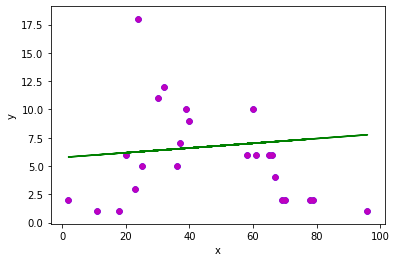

In [8]:
# Le mostramos al modelo valores no conocidos (test set)
plt.scatter(test_set_ejex, test_set_ejey, color="b", marker="o", s=30)

y_pred_test=[]

def regresion_lineal_test(x,y,b):
  plt.scatter(x,y, color="m", marker="o",s=30)

  global y_pred_test
  y_pred_test=b[0]+b[1]*x

  plt.plot(x,y_pred_test,color="g")

  plt.xlabel('x')
  plt.ylabel('y')

  plt.show()

regresion_lineal_test(test_set_ejex, test_set_ejey, resultado)

In [9]:
# calculamos el error cuadratico medio 

A=np.square(y_pred_test - test_set_ejey)
error=np.sum(A)/N

print("Error cuadrático medio del test set: ", error)

Error cuadrático medio del test set:  8.538949016592682


# Modelo de regresión polinomial

Dado que la regresión lineal simple no satisface los puntos, se utilizará una regresion de segundo grado.

\begin{equation}
y_{i}= \beta_{0} + \beta_{1}x_{i} + \beta_{2}x_{i}^2
\end{equation}

Utilizando el mismo modelo de entrenamiento

\begin{equation}
w=(X^{T}X)^{-1}X^{T}y
\end{equation}

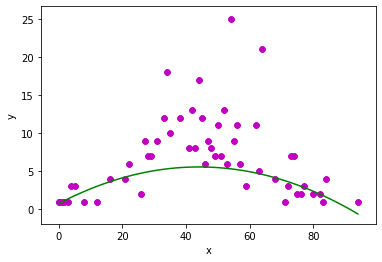

In [10]:
# Implementamos un modelo de segundo grado
N=len(train_set)
X=np.c_[np.ones(N), train_set_ejex, np.square(train_set)]
A=np.linalg.inv(X.T@X)
D=A@X.T

coeficientes= D@train_set_ejey

y_pred_cuadratico=[]

def regresion_lineal(x,y,b):

    plt.scatter(x, y, color = "m",marker = "o", s = 30) 

    x_line = np.linspace(train_set_ejex.min(), train_set_ejex.max(), len(train_set_ejey))
    global y_pred_cuadratico
    y_pred_cuadratico = b[2]*np.square(x_line) + b[1]*x_line + b[0] 
    regresion_linea = y_pred_cuadratico
    plt.plot(x_line, regresion_linea, color = "g") 
    plt.xlabel('x') 
    plt.ylabel('y') 

plt.scatter(train_set_ejex, train_set_ejey, color = 'm', marker = 'o', s = 30)
regresion_lineal(train_set_ejex, train_set_ejey, coeficientes)
plt.show() 

In [11]:
# calculamos el error cuadratico medio 

A=np.square(y_pred_cuadratico - train_set_ejey)
error=np.sum(A)/N

print("Error cuadrático medio del train set: ", error)

Error cuadrático medio del train set:  45.67022805550949


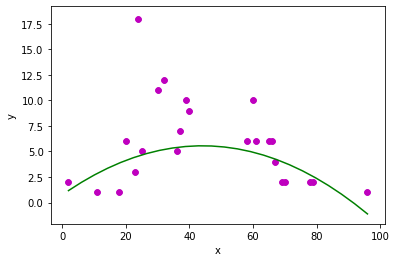

In [12]:
#Usamos los datos de entrenamiento
y_pred_cuadratico_test=[]
def regresion_lineal(x,y,b):

    plt.scatter(x, y, color = "m",marker = "o", s = 30) 

    x_line = np.linspace(test_set_ejex.min(), test_set_ejex.max(), len(test_set_ejey))
    global y_pred_cuadratico_test
    y_pred_cuadratico_test = b[2]*np.square(x_line) + b[1]*x_line + b[0] 
    regresion_linea = y_pred_cuadratico_test
    
    plt.plot(x_line, regresion_linea, color = "g") 
  
    plt.xlabel('x') 
    plt.ylabel('y') 

plt.scatter(test_set_ejex, test_set_ejey, color = 'm', marker = 'o', s = 30)
regresion_lineal(test_set_ejex, test_set_ejey, coeficientes)
plt.show() 

In [13]:
A=np.square(y_pred_cuadratico_test - test_set_ejey)
error=np.sum(A)/N

print("Error cuadrático medio del test set: ", error)

Error cuadrático medio del test set:  8.502346661970662


# Modelo con el uso de scikit learn

En un principio se había pensado usar regresión lineal pero como nos dimos cuenta los datos no se ajustaban a ese modelo.

Es necesario también importar ciertas librerias.

In [14]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

datos_covid=pd.read_csv("https://raw.githubusercontent.com/adrishg/PythonML-PrebecariosProteco/master/DataSets/COVID19_open_line_list.csv?fbclid=IwAR2e-VdsdmyWbo6DOS_Pe3Fh2czQ3AYpDN6qtxXhZD4HvwZVaSMp-biutpA")
print(datos_covid)

        ID  age     sex                        city province country  \
0      1.0   30    male     Chaohu City, Hefei City    Anhui   China   
1      2.0   47    male  Baohe District, Hefei City    Anhui   China   
2      3.0   49    male  High-Tech Zone, Hefei City    Anhui   China   
3      4.0   47  female  High-Tech Zone, Hefei City    Anhui   China   
4      5.0   50  female  Feidong County, Hefei City    Anhui   China   
...    ...  ...     ...                         ...      ...     ...   
14121  NaN  NaN     NaN                         NaN      NaN     NaN   
14122  NaN  NaN     NaN                         NaN      NaN     NaN   
14123  NaN  NaN     NaN                         NaN      NaN     NaN   
14124  NaN  NaN     NaN                         NaN      NaN     NaN   
14125  NaN  NaN     NaN                         NaN      NaN     NaN   

       wuhan(0)_not_wuhan(1)   latitude   longitude geo_resolution  ...  \
0                        1.0  31.646960  117.716600         

# Vamos a verificar los datos del dataset

In [15]:
print('Información en el dataset:')
print(datos_covid.keys())
print()


Información en el dataset:
Index(['ID', 'age', 'sex', 'city', 'province', 'country',
       'wuhan(0)_not_wuhan(1)', 'latitude', 'longitude', 'geo_resolution',
       'date_onset_symptoms', 'date_admission_hospital', 'date_confirmation',
       'symptoms', 'lives_in_Wuhan', 'travel_history_dates',
       'travel_history_location', 'reported_market_exposure',
       'additional_information', 'chronic_disease_binary', 'chronic_disease',
       'source', 'sequence_available', 'outcome', 'date_death_or_discharge',
       'notes_for_discussion', 'location', 'admin3', 'admin2', 'admin1',
       'country_new', 'admin_id', 'data_moderator_initials', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44'],
      dtype='object')



# Vamos a verificar las caracteristicas del dataset

In [16]:
print('Características del dataset:')
print(datos_covid.describe)

Características del dataset:
<bound method NDFrame.describe of         ID  age     sex                        city province country  \
0      1.0   30    male     Chaohu City, Hefei City    Anhui   China   
1      2.0   47    male  Baohe District, Hefei City    Anhui   China   
2      3.0   49    male  High-Tech Zone, Hefei City    Anhui   China   
3      4.0   47  female  High-Tech Zone, Hefei City    Anhui   China   
4      5.0   50  female  Feidong County, Hefei City    Anhui   China   
...    ...  ...     ...                         ...      ...     ...   
14121  NaN  NaN     NaN                         NaN      NaN     NaN   
14122  NaN  NaN     NaN                         NaN      NaN     NaN   
14123  NaN  NaN     NaN                         NaN      NaN     NaN   
14124  NaN  NaN     NaN                         NaN      NaN     NaN   
14125  NaN  NaN     NaN                         NaN      NaN     NaN   

       wuhan(0)_not_wuhan(1)   latitude   longitude geo_resolution  ... 

# Vamos a saber la cantidad de datos y el nombre de las columnas

In [17]:
print('Cantidad de datos:')
print(datos_covid.shape)
print()


Cantidad de datos:
(14126, 45)



In [18]:
print('Nombres columnas:')
print(datos_covid.head)

Nombres columnas:
<bound method NDFrame.head of         ID  age     sex                        city province country  \
0      1.0   30    male     Chaohu City, Hefei City    Anhui   China   
1      2.0   47    male  Baohe District, Hefei City    Anhui   China   
2      3.0   49    male  High-Tech Zone, Hefei City    Anhui   China   
3      4.0   47  female  High-Tech Zone, Hefei City    Anhui   China   
4      5.0   50  female  Feidong County, Hefei City    Anhui   China   
...    ...  ...     ...                         ...      ...     ...   
14121  NaN  NaN     NaN                         NaN      NaN     NaN   
14122  NaN  NaN     NaN                         NaN      NaN     NaN   
14123  NaN  NaN     NaN                         NaN      NaN     NaN   
14124  NaN  NaN     NaN                         NaN      NaN     NaN   
14125  NaN  NaN     NaN                         NaN      NaN     NaN   

       wuhan(0)_not_wuhan(1)   latitude   longitude geo_resolution  ...  \
0           

In [19]:
conteo_edades=datos_covid_female_filtrados["Edad"].value_counts()

/* X_p=conteo_edades
print(X_p) */

In [20]:
d={'Edad':conteo_edades.keys(), 'Conteo': conteo_edades.values}
datos_scratch=pd.DataFrame(d)

# /* Y_p = [] */

In [21]:
X_p= list(conteo_edades.keys())
Y_p= list(conteo_edades.values)

# Usaremos los mismos set en sklearn y scratch

In [22]:
datos_scratch_shuffle= datos_scratch.sample(frac=1)

# El tamaño del train set será el 70% de los datos
train_size=int(0.7*len(datos_scratch))

train_set=datos_scratch_shuffle[:train_size]
# El otro 30% serán datos de entrenamiento
test_set=datos_scratch_shuffle[train_size:]

train_set_ejex=train_set["Edad"]
train_set_ejex=train_set_ejex.values
train_set_ejey=train_set["Conteo"]
train_set_ejey=train_set_ejey.values

test_set_ejex=test_set["Edad"]
test_set_ejex=test_set_ejex.values
test_set_ejey=test_set["Conteo"]
test_set_ejey=test_set_ejey.values

## Implementaremos sklearn con regresion polinomial

In [23]:
from sklearn.model_selection import train_test_split


train_set_ejex, test_set_ejex, train_set_ejey, test_set_ejey= train_test_split(X_p, Y_p, test_size=0.2)


Nuestro polinomio va a ser grado 2

In [24]:
from sklearn.preprocessing import PolynomialFeatures

poli_reg = PolynomialFeatures(degree = 2)


In [31]:

X_trainp= poli_reg.fit_transform(train_set_ejex)

X_testp = poli_reg.fit_transform(test_set_ejex)

ValueError: Expected 2D array, got 1D array instead:
array=[4.000e+00 5.300e+01 3.500e+01 7.300e+01 3.800e+01 7.900e+01 5.700e+01
 9.600e+01 7.400e+01 8.200e+01 1.100e+01 2.100e+01 8.400e+01 2.600e+01
 7.600e+01 3.600e+01 2.800e+01 5.100e+01 5.500e+01 2.400e+01 2.700e+01
 4.700e+01 6.900e+01 3.100e+01 8.000e+01 3.000e+01 6.500e+01 5.000e+00
 5.200e+01 6.600e+01 2.900e+01 1.200e+01 4.300e+01 6.300e+01 5.800e+01
 8.000e+00 4.400e+01 5.000e+01 6.800e+01 7.100e+01 6.100e+01 7.200e+01
 9.400e+01 7.700e+01 2.200e+01 2.500e-01 5.600e+01 3.700e+01 8.333e-02
 3.900e+01 6.400e+01 6.000e+01 4.100e+01 5.900e+01 2.500e+01 4.500e+01
 1.600e+01 3.300e+01 4.000e+01 2.000e+01 1.750e+00 8.300e+01 1.000e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
pr = linear_model.LinearRegression()

pr.fit(X_trainp, train_set_ejey)

Y_pred_pr = pr.predict(X_testp)


# Se realiza la gráfica

NameError: name 'X_testp' is not defined

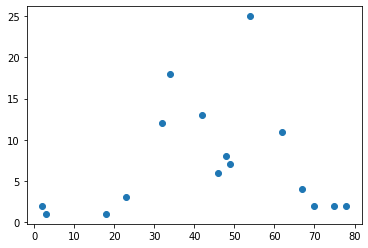

In [34]:
plt.scatter(test_set_ejex,test_set_ejey)
plt.plot(X_testp, Y_pred_pr, color='red', linewidth=3)
plt.show()
print()
print('Regresión polinomial')
print()